## Observations and Insights 

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data = pd.DataFrame.merge(mouse_metadata, study_results, on="Mouse ID", how='outer')
# Display the data table for preview
study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [18]:
# Checking the number of mice.
num_mice = study_data["Mouse ID"].nunique()
num_mice

249

In [19]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = study_data.loc[study_data.duplicated(["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate
# mouse_id = duplicate.loc["Mouse ID"]
# mouse_id

array(['g989'], dtype=object)

In [20]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse = pd.DataFrame(duplicate)
duplicate_mouse

,0
0,g989


In [21]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# duplicate_mice = study_data.drop_duplicates(subset=["Mouse ID"])
# duplicate_mice_data = pd.DataFrame(duplicate_mice)
# duplicate_mice_data
duplicate_mice = study_data[study_data.isin(duplicate) == False]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [22]:
# Checking the number of mice in the clean DataFrame.
number_mice = duplicate_mice.count()["Mouse ID"]
number_mice

1880

## Summary Statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen = duplicate_mice.groupby(["Drug Regimen"])
mean_drug = drug_regimen.mean()["Tumor Volume (mm3)"]
median_drug = drug_regimen.median()["Tumor Volume (mm3)"]
var_drug = drug_regimen.var()["Tumor Volume (mm3)"]
stddev_drug = drug_regimen.std()["Tumor Volume (mm3)"]
sem_drug = drug_regimen.sem()["Tumor Volume (mm3)"]
summary_statistics1 = pd.DataFrame({"Mean": mean_drug, "Median": var_drug, "Variance": var_drug, 
                                    "STD": stddev_drug, "SEM": sem_drug})
summary_statistics1
# This method is the most straighforward, creating multiple series and putting them all together at the end.



,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,24.947764,24.947764,4.994774,0.329346
Ceftamin,52.591172,39.290177,39.290177,6.268188,0.469821
Infubinol,52.884795,43.128684,43.128684,6.567243,0.492236
Ketapril,55.235638,68.553577,68.553577,8.279709,0.603860
Naftisol,54.331565,66.173479,66.173479,8.134708,0.596466
Placebo,54.033581,61.168083,61.168083,7.821003,0.581331
Propriva,52.322552,42.351070,42.351070,6.507770,0.512884
Ramicane,40.216745,23.486704,23.486704,4.846308,0.320955
Stelasyn,54.233149,59.450562,59.450562,7.710419,0.573111


In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# drug_regimendata= drug_regimen["Tumor Volume (mm3)"].describe()
# drug_regimendata
summary_statistics2 = duplicate_mice.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean', 
                                                                                          'median', 'var', 'std', 'sem'])
summary_statistics2 
# This method produces everything in a single groupby function

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

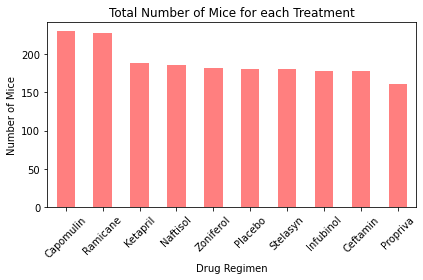

In [25]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_count = duplicate_mice["Drug Regimen"].value_counts()
# tick_settings = [value for value in drugs]
# drugs = duplicate_mice["Drug Regimen"].unique()
drug_count.plot(kind='bar', facecolor='r', alpha=0.5)
plt.title("Total Number of Mice for each Treatment")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=45)


# drug_count.set_xticklabels(tick_settings, rotation=45)
plt.tight_layout()

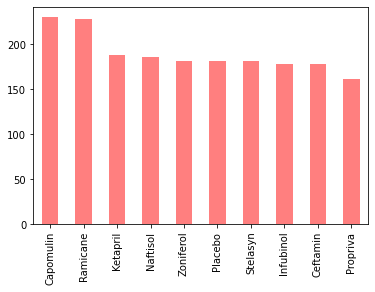

In [41]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
list_drugs = duplicate_mice["Drug Regimen"]
drugs = list_drugs.unique()
# drugs = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',  
#          'Placebo', 'Stelasyn', 'Infubinol', 'Ceftamin', 'Propriva']
mice_count = list_drugs.value_counts()
mice_count
mice_count.plot.bar(mice_count, color='r', alpha=0.5, align='center')
# tick_locations = [value for value in drugs]
# plt.bar(drugs, mice_count, color='r', alpha=0.5, align='center')
# plt.xticks(tick_locations, drugs, rotation=45)
# plt.title("Total Number of Mice for each Treatment")
# plt.ylabel("Number of Mice")
# plt.xlabel("Drug Regimen")
# plt.show()

# drugs = duplicate_mice["Drug Regimen"].value_counts()
# tick_locations = [value for value in drugs]
# plt.bar(drugs, drug_regimen["Mouse ID"], color='r', alpha=0.5, align='center')
# plt.xticks(tick_locations, drug_regimen["Drug Regimen"], rotation='vertical')
# plt.show()
# x_axis = drug_regimen
# y_axis = drug_regimen["Mouse ID"].count()
# plt.bar(x_axis, y_axis)
# plt.show()

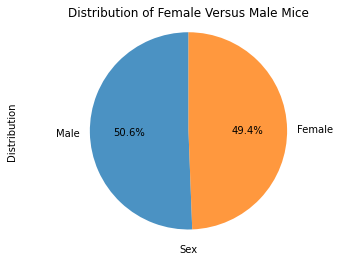

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = duplicate_mice["Sex"].value_counts()
gender_count.plot(kind='pie', title="Distribution of Female Versus Male Mice", autopct='%1.1f%%', 
                  startangle=90, wedgeprops={'alpha': 0.8})
plt.ylabel("Distribution")
plt.xlabel("Sex")
plt.axis('equal')

plt.show()

(-1.1027130801595115,
 1.105172849624489,
 -1.1045613723658971,
 1.1002172082078998)

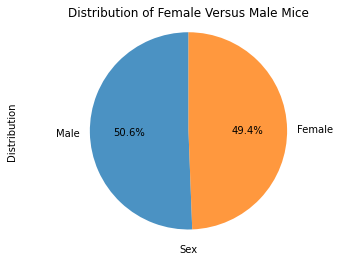

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = duplicate_mice["Sex"].value_counts()
gender_count
gender = duplicate_mice["Sex"].unique()
plt.pie(gender_count, labels=gender, autopct='%1.1f%%', startangle=90, wedgeprops={'alpha': 0.8})
plt.title("Distribution of Female Versus Male Mice")
plt.ylabel("Distribution")
plt.xlabel("Sex")
plt.axis('equal')

## Quartiles, Outliers and Boxplots

In [42]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# grouped_drugs = duplicate_mice[duplicate_mice.groupby(["Drug Regimen", "Mouse ID"]).transform(max) == duplicate_mice["Timepoint"]
# grouped_drugs.head()
grouped_drugs = duplicate_mice.groupby(["Mouse ID"])["Timepoint"].max()
grouped_drugs

# last_timepoint = grouped_drugs.max()["Timepoint"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint (left merge)


Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
